Extent of Occurrence data quality check
---------------

Cara and I used the extent of occurrence (EOO) from BirdLife for each species as a reference point to indicate whether we were calculating the EOO correctly; for example, [BirdLife's king vulture](https://datazone.birdlife.org/species/factsheet/king-vulture-sarcoramphus-papa) EOO is 22,600,000 km$^2$ and ours is 17,390,218 km$^2$, potentially because they have access to additional data sources that we do not.
Here I compare the raw data of the EOO from BirdLife and the EOO that Cara and I calculated in ArcGIS with the convex hull method to make sure that our calculations produced reasonable and realistic values.

In [6]:
import pandas as pd  # For manipulating data structures
import numpy as np  # For mathematical functions
import matplotlib.pyplot as plt  # Essentially the Python equivalent to ggplot2
import seaborn as sns  # A library for statistical graphics built on Matplotlib
from scipy.stats import ttest_ind # import a specific t-test function

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
}
sns.set_theme(
    context="notebook",
    style="ticks",
    palette="colorblind",
    rc=custom_params,
)

In [2]:
scavengers = pd.read_csv("../data/cleaned scavenger data.csv")
scavengers.head()

,Species name,Scientific name,Diet,Extent of occurrence,BirdLife Extent of occurrence,Body size,log Extent of occurrence,log Body size
0,Black vulture,Coragyps atratus,Obligate,42593865.0,44300000.0,2200,7.629347,3.342423
1,Turkey vulture,Cathartes aura,Obligate,52285085.0,47100000.0,2500,7.718378,3.397940
2,Lesser yellow headed vulture,Cathartes burrovianus,Obligate,19989926.0,19600000.0,950,7.300811,2.977724
3,Greater yellow headed vulture,Cathartes melambrotus,Obligate,7481821.0,7330000.0,1650,6.874007,3.217484
4,King vulture,Sarcoramphus papa,Obligate,17390218.0,22600000.0,3800,7.240305,3.579784


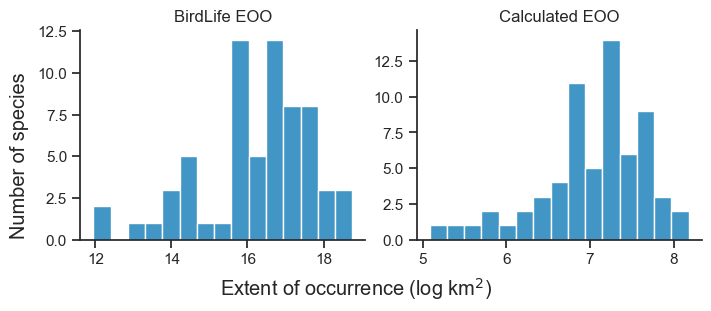

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3), layout="constrained")

x_axes = [
    np.log(scavengers["BirdLife Extent of occurrence"]),
    scavengers["log Extent of occurrence"],
]
titles = ["BirdLife EOO", "Calculated EOO"]

for ax, title, x_axes in zip(axes, titles, x_axes):
    sns.histplot(
        ax=ax,
        data=scavengers,
        x=x_axes,
        bins=15,
    )
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(title)

fig.supylabel("Number of species")
fig.supxlabel("Extent of occurrence (log km$^2$)")

plt.show()

The data is left-skewed before log-transformation, which looks approximately normal after transforming.

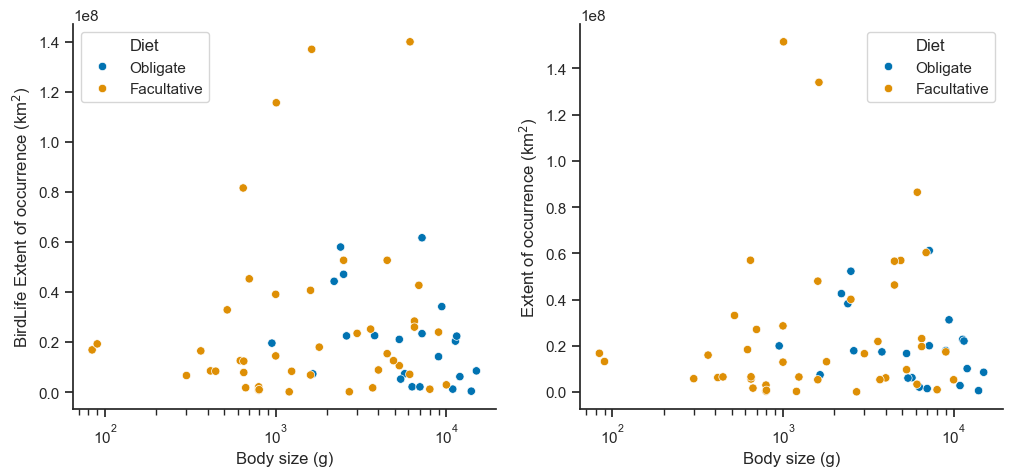

In [4]:
fig, (ax1, ax2) = plt.subplots(
    1,  # The number of rows in my plot.
    2,  # The number of columns in my plot.
    figsize=(12, 5),
    sharex=True,
)

sns.scatterplot(
    ax=ax1,
    x="Body size",
    y="BirdLife Extent of occurrence",
    hue="Diet",
    data=scavengers,
)
sns.scatterplot(
    ax=ax2,
    x="Body size",
    y="Extent of occurrence",
    hue="Diet",
    data=scavengers,
)
ax1.set_xlabel("Body size (g)")
ax2.set_xlabel("Body size (g)")
ax1.set_ylabel("BirdLife Extent of occurrence (km$^2$)")
ax2.set_ylabel("Extent of occurrence (km$^2$)")

plt.xscale("log")  # Default log scale used by Seaborn is base 10, not natural log.
plt.show()

Visually they look very similar, but let's also check this statistically with a t-test for two independent samples using [Scipy's `ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). (Source: [Singh, 2024. T-Test in Pandas: Statistical Analysis in Python 3](https://dnmtechs.com/t-test-in-pandas-statistical-analysis-in-python-3/))

In [5]:
t_statistic, p_value = ttest_ind(
    scavengers["BirdLife Extent of occurrence"], scavengers["Extent of occurrence"]
)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.18452170253585773
P-Value: 0.8538962323902077


BirdLife's and our EOOs are not significantly different, which is excellent news and tells me that our calculated EOO values are of sound quality.